In [633]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import functools
import copy

In [634]:
def random_G(node_count, edge_count=None, range_=(1,10)):
    G = nx.random_tree(node_count)
    not_G_edges = list(nx.complement(G).edges())
    
    if not edge_count:
        new_edge_count = len(not_G_edges) // 2
    else:
        new_edge_count = edge_count - node_count + 1
        
    if new_edge_count <= 0:
        pass
    elif new_edge_count > len(not_G_edges):
        G.add_edges_from(not_G_edges)
    else:
        G.add_edges_from(random.sample(not_G_edges, new_edge_count))
    for x, y, data in G.edges(data=True):
        data['weight'] = random.randint(range_[0], range_[1])
    return G

def draw_G(G, title=None, figsize=(10, 8), font_size=20):
    options = {
        'node_color': '#99e6ff',
        'node_size': font_size*40,
        'width': 1,
        'font_size': font_size,
        'labels': {node: f"{node}" for node, param in G.nodes(data=True)}
    }
    plt.figure(figsize=figsize)
    if title:
        plt.title(title, fontdict = {'fontsize' : 20})
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, **options)
    
    edge_labels=nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=font_size)
    if G.nodes:
        ax = plt.gca()
        ax.collections[0].set_edgecolor("#000000")
    plt.show()

### Задание 1.
- Построить остовное дерево минимального веса на графе, используя алгоритм Краскала.
- Визуализировать решение.

helpdesk - only: https://habr.com/ru/post/569444/

In [635]:
def get_spanning_tree(G, show_steps=False, figsize=(10, 8), font_size=10):
    
    sorted_edges = sorted(nx.get_edge_attributes(G, 'weight').items(), key=lambda kv: kv[1])
    total_node_count = len(G.nodes)
    G_spanning_tree = nx.Graph()
    rank = 0
    for i, (edge, weight) in enumerate(sorted_edges):
        step_skipped = False
        nodes_spanning = G_spanning_tree.nodes
        temp_wich_in = np.array(((edge[0] in nodes_spanning), (edge[1] in nodes_spanning)))
        if (temp_wich_in.sum()==0):
            G_spanning_tree.add_node(edge[0], rank=rank)
            G_spanning_tree.add_node(edge[1], rank=rank)
            G_spanning_tree.add_edge(*edge, weight=weight)
            rank += 1
        elif (temp_wich_in.sum()==1):
            in_tree = edge[temp_wich_in.argmax()]
            not_in_tree = edge[temp_wich_in.argmin()]
            temp_rank = G_spanning_tree.nodes[in_tree]['rank']
            G_spanning_tree.add_node(not_in_tree, rank=temp_rank)
            G_spanning_tree.add_edge(*edge, weight=weight)
        else:
            if G_spanning_tree.nodes[edge[0]]['rank'] != G_spanning_tree.nodes[edge[1]]['rank']:
                common_rank = G_spanning_tree.nodes[edge[0]]['rank']
                for node in nx.node_connected_component(G_spanning_tree,  edge[1]):
                    G_spanning_tree.nodes[node]['rank'] = common_rank
                G_spanning_tree.add_edge(*edge, weight=weight)
            else:
                step_skipped = True
        if not step_skipped and show_steps:
            draw_G(G_spanning_tree, figsize=figsize, font_size=font_size, title=f"STEP {i+1}, added edge {edge}")
        if len(G_spanning_tree.edges) == total_node_count-1:
            break
    return G_spanning_tree

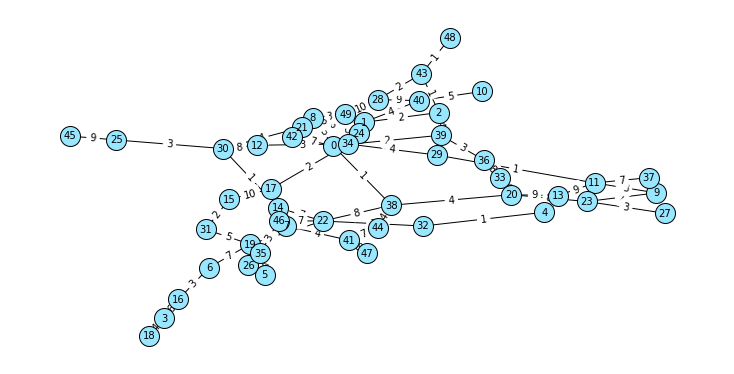

In [636]:
G = random_G(50, 65)
draw_G(G, figsize=(10,5), font_size=10)

In [637]:
sp_tree_G = get_spanning_tree(G, show_steps=False, figsize=(5,5), font_size=8)

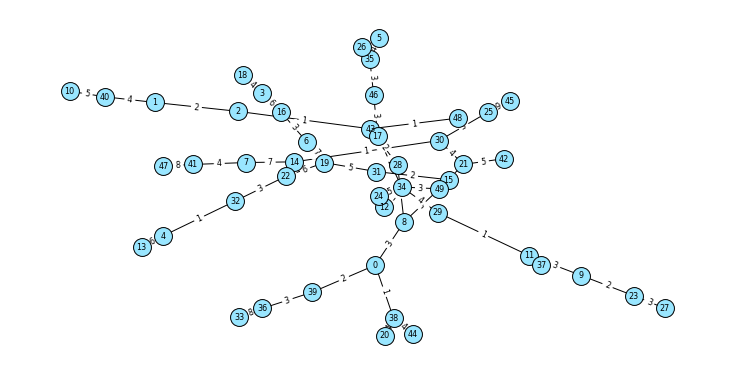

In [638]:
draw_G(sp_tree_G, figsize=(10,5), font_size=8)

In [639]:
print(f"Общий вес графа: {sp_tree_G.size(weight='weight')}")
print(f"Ребра графа {sorted(sp_tree_G.edges)}")

Общий вес графа: 193.0
Ребра графа [(0, 8), (0, 38), (0, 39), (1, 40), (2, 1), (2, 43), (3, 18), (4, 13), (4, 32), (6, 16), (6, 19), (7, 41), (8, 28), (8, 49), (9, 23), (11, 9), (11, 29), (11, 37), (14, 7), (14, 22), (14, 30), (15, 31), (16, 3), (17, 34), (17, 46), (21, 42), (22, 19), (23, 27), (25, 45), (29, 34), (30, 21), (30, 25), (31, 19), (32, 22), (34, 12), (34, 24), (34, 49), (35, 5), (35, 26), (36, 33), (38, 20), (38, 44), (39, 36), (40, 10), (41, 47), (43, 28), (43, 48), (46, 35), (49, 21)]


### Задание 2.
- Выбрать случайным образом 5 ребер графа и поменять их веса в диапазоне от 1 до 3. Построить остовное дерево минимального веса. Проверить как количественно и структурно изменилось решение.
- Визуализировать изменение решения.


In [640]:
def change_weights(G, n_samples=5, range_=(1,3)):
    for edge in random.sample(list(G.edges), n_samples):
        G[edge[0]][edge[1]]['weight'] = random.randint(range_[0], range_[1])
    return G

In [641]:
G2 = copy.deepcopy(G)
change_weights(G2);

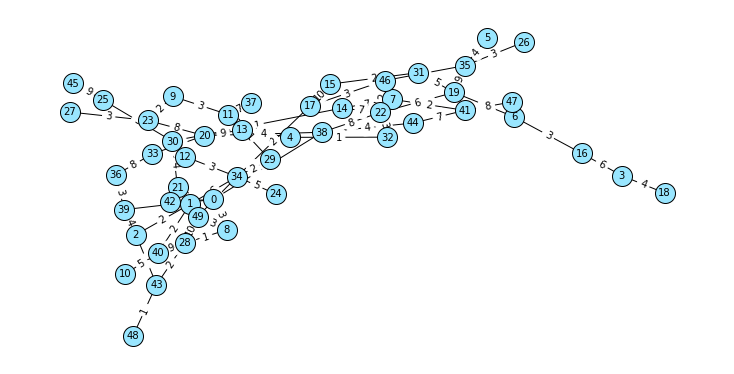

In [642]:
draw_G(G2, font_size=10, figsize=(10,5))

In [643]:
sp_tree_G_2 = get_spanning_tree(G2, show_steps=False, figsize=(5,5), font_size=8)

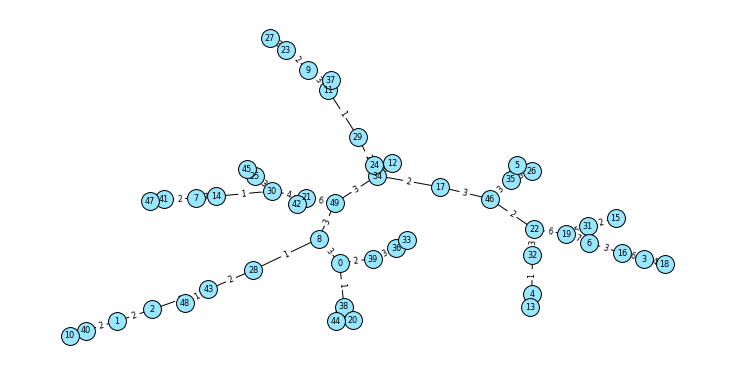

In [644]:
draw_G(sp_tree_G_2, figsize=(10,5), font_size=8)

In [645]:
print(f"Общий вес графа: {sp_tree_G_2.size(weight='weight')}")
print(f"Ребра графа {sorted(sp_tree_G_2.edges)}")

Общий вес графа: 176.0
Ребра графа [(0, 8), (0, 38), (0, 39), (1, 40), (2, 1), (2, 43), (3, 18), (4, 13), (4, 32), (6, 16), (6, 19), (7, 41), (8, 28), (8, 49), (9, 23), (11, 9), (11, 29), (11, 37), (14, 7), (14, 30), (15, 31), (16, 3), (17, 34), (17, 46), (21, 42), (22, 19), (22, 46), (23, 27), (25, 45), (26, 35), (29, 34), (30, 21), (30, 25), (31, 19), (32, 22), (34, 12), (34, 24), (34, 49), (35, 5), (36, 33), (38, 20), (38, 44), (39, 36), (40, 10), (41, 47), (43, 28), (43, 48), (46, 35), (49, 21)]


### Задание 3.
- Провести 30 итераций задачи 2.
- Построить график изменения количественного и структурного изменения.


In [646]:
def plot_(weights, i):
    plt.figure(figsize=(15,5))
    plt.title(f"Вес остовного дерева при изменении весов {i+1} раз", fontdict={'fontsize': 25})
    plt.plot(weights, linewidth=3, color='red');
    plt.grid(color='black', linewidth = 1.2);
    plt.minorticks_on()
    plt.grid(which='minor');

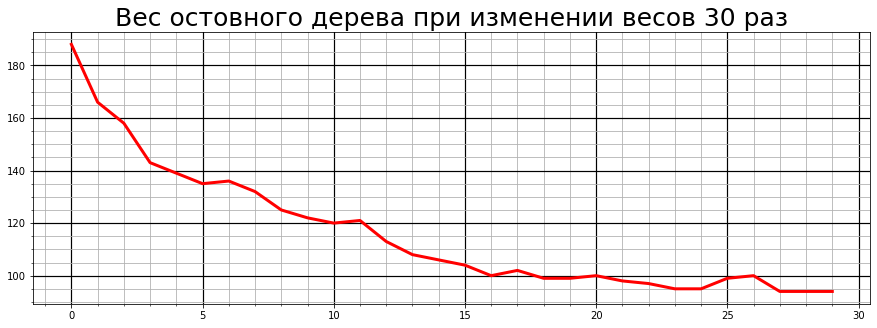

In [647]:
G3 = copy.deepcopy(G)
weights = []
for i in range(30):
    change_weights(G3);
    sp_tree_G_3 = get_spanning_tree(G3, show_steps=False)
    weight_sp_tree_G3 = sp_tree_G_3.size(weight='weight')
    weights.append(weight_sp_tree_G3)
#     print(f"Общий вес графа: {weight_sp_tree_G3}")
#     print(f"Ребра графа {sorted(sp_tree_G_3.edges)}")
plot_(weights, i)

### Задача 4.
- Решить Задачу 3, меняя диапазон изменения весов. Т.е. заменив диапазон от 1 до 3 на другой.
- Провести сравнение (анализ) результатов с задачей 3.

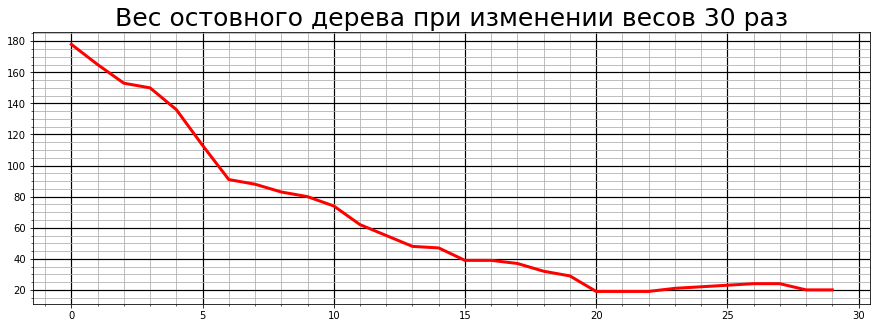

In [648]:
G4 = copy.deepcopy(G)
weights = []
for i in range(30):
    change_weights(G4, range_=(0,1));
    sp_tree_G_4 = get_spanning_tree(G4, show_steps=False)
    weight_sp_tree_G4 = sp_tree_G_4.size(weight='weight')
    weights.append(weight_sp_tree_G4)
#     print(f"Общий вес графа: {weight_sp_tree_G4}")
#     print(f"Ребра графа {sorted(sp_tree_G_4.edges)}")
plot_(weights, i)